In [3]:
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [5]:
X  = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(int)

In [9]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

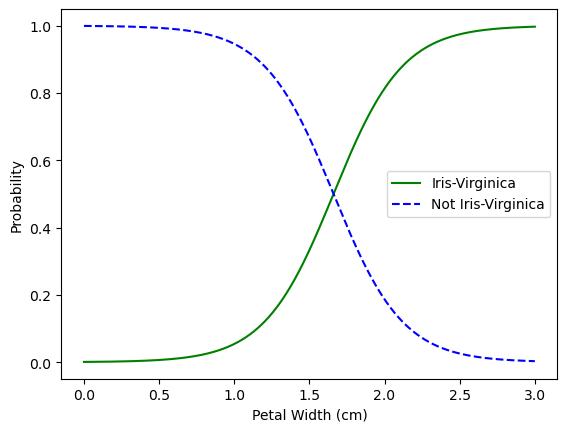

In [13]:
import matplotlib.pyplot as plt

X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.xlabel("Petal Width (cm)")
plt.ylabel("Probability")
plt.legend()
plt.show()

We can see the confidence of the model on the instance being Iris-Virginica based on the petal width. The point where the model gets confused is at around 1.4 - 1.8 cm

In [16]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

## SoftMax Regression

In [17]:
X = iris["data"][:, (2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

c:\Users\Roi_f\anaconda3\envs\personal\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

In [28]:
print(f"The model predict class number {softmax_reg.predict([[5,2]])[0]}, with a probability of {max(softmax_reg.predict_proba([[5,2]])[0])}")

The model predict class number 2, with a probability of 0.942630398144702
